In [2]:
import pandas as pd, numpy as np

In [7]:
from tensorly.decomposition import CP

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' # для лучшего разрешения картинки
import seaborn as sns

def components_draw(x, factors, rank):
    
    cols = ['samples', 'emission wavelengths', 'excitation wavelengthsal']
    fig, ax = plt.subplots(rank, 3 ,figsize=(9, 12))
    for n in range(rank):
        ax[n,0].plot(np.arange(0,x.shape[0],1), factors[1][0][:,n])
        ax[n,1].plot(np.arange(0,x.shape[1],1), factors[1][1][:,n])
        ax[n,2].plot(np.arange(0,x.shape[2],1), factors[1][2][:,n])
        
    for ax, col in zip(ax[0], cols):
        ax.set_title(col)
    
    fig.savefig('tensorly,rank3.pdf')
    plt.show()

In [3]:
from scipy.io.matlab import loadmat

In [34]:
mat = loadmat('sugat/sugar_Process/data.mat')

In [35]:
X = mat['X'].reshape([268,571,7])

In [36]:
cp = CP(rank = 3, verbose=False)
factors = cp.fit_transform(X)

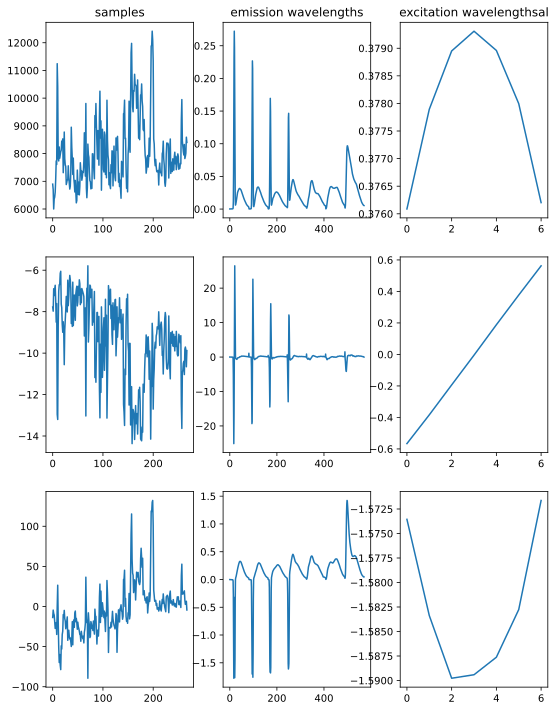

In [37]:
components_draw(X, factors, 3)

np.reshape((U[0, :, :] @ scipy.linalg.khatri_rao(U[1, :, :], U[2, :, :]).T), X.shape)

In [64]:
def relative_error(X, am):
    err = np.array([])
    for i in range(1,am):
        cp = CP(rank = i+1, verbose=False)
        factors = cp.fit_transform(X)
        X1 = np.reshape(factors[1][0] @ khatri_rao(factors[1][1], factors[1][2]).T, X.shape)
        err = np.append(err, np.linalg.norm(X - X1)/np.linalg.norm(X1))
    
    plt.plot(np.arange(1,am), err, label = 'rel_error')
    plt.title('tensorly, relative_error')
    plt.savefig('tensorly,relat.pdf')
    plt.legend()

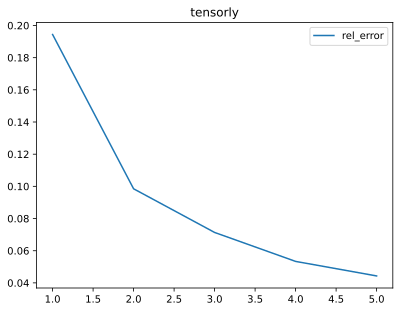

In [65]:
relative_error(X,6)

In [111]:
from scipy.linalg import khatri_rao

In [113]:
import tensortools as tt
from tensortools.operations import unfold as tt_unfold, khatri_rao
import tensorly as tl

def decompose_three_way(tensor, rank, max_iter=501, verbose=False):

    # a = np.random.random((rank, tensor.shape[0]))
    b = np.random.random((rank, tensor.shape[1]))
    c = np.random.random((rank, tensor.shape[2]))

    for epoch in range(max_iter):
        # optimize a
        input_a = khatri_rao([b.T, c.T])
        target_a = tl.unfold(tensor, mode=0).T
        a = np.linalg.solve(input_a.T.dot(input_a), input_a.T.dot(target_a))

        # optimize b
        input_b = khatri_rao([a.T, c.T])
        target_b = tl.unfold(tensor, mode=1).T
        b = np.linalg.solve(input_b.T.dot(input_b), input_b.T.dot(target_b))

        # optimize c
        input_c = khatri_rao([a.T, b.T])
        target_c = tl.unfold(tensor, mode=2).T
        c = np.linalg.solve(input_c.T.dot(input_c), input_c.T.dot(target_c))

        if verbose and epoch % int(max_iter * .2) == 0:
            res_a = np.square(input_a.dot(a) - target_a)
            res_b = np.square(input_b.dot(b) - target_b)
            res_c = np.square(input_c.dot(c) - target_c)
            print("Epoch:", epoch, "| Loss (C):", res_a.mean(), "| Loss (B):", res_b.mean(), "| Loss (C):", res_c.mean())

    return a.T, b.T, c.T

In [101]:
a,b,c = decompose_three_way(X, 3)
factors_U = [a,b,c]

In [107]:
def components_draw_2(x, factors, rank):
    
    cols = ['samples', 'emission wavelengths', 'excitation wavelengthsal']
    fig, ax = plt.subplots(rank, 3 ,figsize=(7, 10))
    for n in range(rank):
        ax[n,0].plot(np.arange(0,x.shape[0],1), factors[0][:,n])
        ax[n,1].plot(np.arange(0,x.shape[1],1), factors[1][:,n])
        ax[n,2].plot(np.arange(0,x.shape[2],1), factors[2][:,n])
        
    for ax, col in zip(ax[0], cols):
        ax.set_title(col)
    
    fig.savefig('tensorly_U,rank3.pdf')
    plt.show()

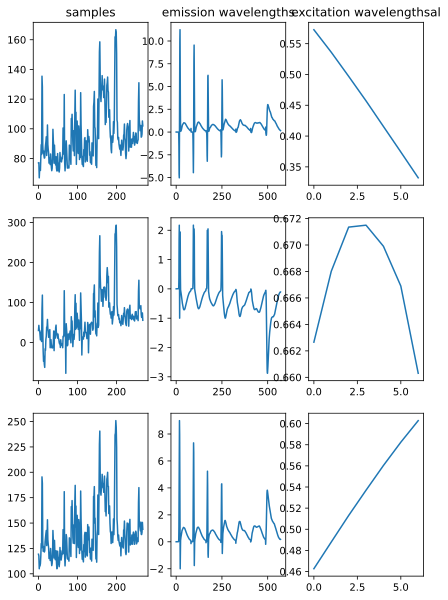

In [108]:
components_draw_2(X, factors_U, 3)

In [114]:
def relative_error_2(X, am):
    err = np.array([])
    for i in range(1,am):
        a,b,c = decompose_three_way(X, i)
        factors_U = [a,b,c]
        X1 = np.reshape(factors_U[0] @ khatri_rao([factors_U[1], factors_U[2]]).T, X.shape)
        err = np.append(err, np.linalg.norm(X - X1)/np.linalg.norm(X1))
    
    plt.plot(np.arange(1,am), err, label = 'rel_error')
    plt.title('tensorly, relative_error')
    plt.savefig('tensorly,relat.pdf')
    plt.legend()

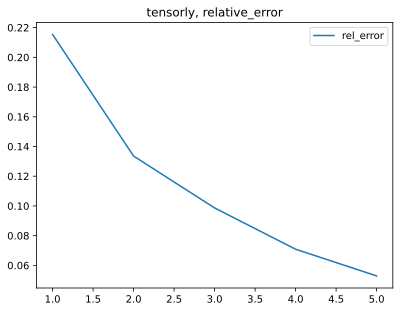

In [116]:
relative_error_2(X,6)